In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

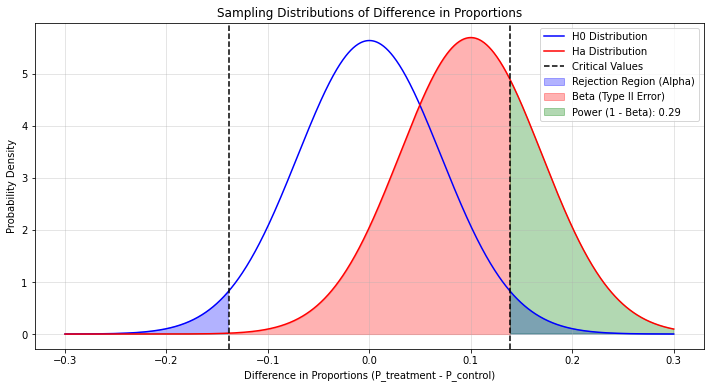

In [10]:
# Parameters for proportions
p_treatment_H0 = 0.5  # Proportion under H0 (same for treatment and control)
p_control_H0 = 0.5
p_treatment_Ha = 0.6  # Hypothetical proportion under Ha for treatment
p_control_Ha = 0.5

n_treatment = 100  # Sample size for treatment group
n_control = 100  # Sample size for control group

# Sampling distributions for the difference in proportions
mean_H0 = p_treatment_H0 - p_control_H0
# std_H0 = np.sqrt(p_treatment_H0 * (1 - p_treatment_H0) / n_treatment +
#                  p_control_H0 * (1 - p_control_H0) / n_control)
p_pooled = (n_treatment*p_treatment_H0+n_control*p_control_H0)/(n_treatment+n_control)
std_H0 = np.sqrt(p_pooled * (1 - p_pooled) / n_treatment +
                 p_pooled * (1 - p_pooled) / n_control)

mean_Ha = p_treatment_Ha - p_control_Ha
std_Ha = np.sqrt(p_treatment_Ha * (1 - p_treatment_Ha) / n_treatment +
                 p_control_Ha * (1 - p_control_Ha) / n_control)


# X-axis values (on the original scale of differences)
x_diff = np.linspace(-0.3, 0.3, 1000)

# Probability density functions
pdf_H0_diff = norm.pdf(x_diff, loc=mean_H0, scale=std_H0)
pdf_Ha_diff = norm.pdf(x_diff, loc=mean_Ha, scale=std_Ha)


# Plot the distributions
plt.figure(figsize=(12, 6))
plt.plot(x_diff, pdf_H0_diff, label="H0 Distribution", color="blue")# (P_treatment = P_control)
plt.plot(x_diff, pdf_Ha_diff, label="Ha Distribution ", color="red")#(P_treatment ≠ P_control)

# Critical regions under H0
critical_left = mean_H0 - 1.96 * std_H0  # Two-tailed test critical value
critical_right = mean_H0 + 1.96 * std_H0
# Calculate the power (1 - Beta)
power = 1 - (norm.cdf(critical_right, loc=mean_Ha, scale=std_Ha) -
             norm.cdf(critical_left, loc=mean_Ha, scale=std_Ha))

plt.axvline(critical_left, color="black", linestyle="--", label="Critical Values")
plt.axvline(critical_right, color="black", linestyle="--")

# Highlight critical regions
plt.fill_between(x_diff, 0, pdf_H0_diff, where=(x_diff < critical_left) | (x_diff > critical_right), 
                 color="blue", alpha=0.3, label="Rejection Region (Alpha)")

# Highlight overlap (Beta region under Ha)
plt.fill_between(x_diff, 0, pdf_Ha_diff, where=(x_diff > critical_left) & (x_diff < critical_right),
                 color="red", alpha=0.3, label="Beta (Type II Error)")

# Highlight power (1 - Beta)
plt.fill_between(x_diff, 0, pdf_Ha_diff, where=(x_diff < critical_left) | (x_diff > critical_right),
                 color="green", alpha=0.3, label=f"Power (1 - Beta): {round(power,2)}")

# Labels and legend
plt.title("Sampling Distributions of Difference in Proportions")
plt.xlabel("Difference in Proportions (P_treatment - P_control)")
plt.ylabel("Probability Density")
plt.legend(loc="upper right")
plt.grid(alpha=0.4)
plt.show()

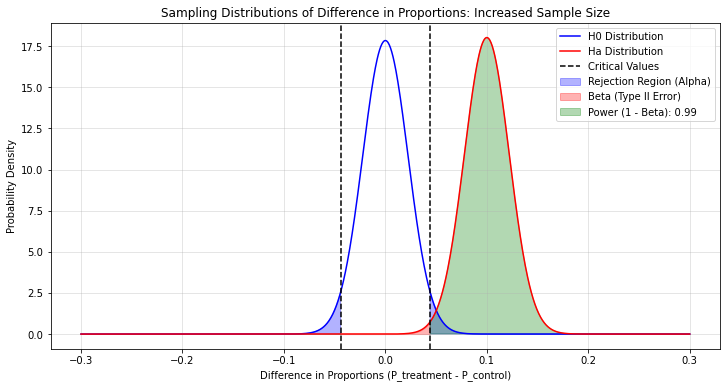

In [12]:
# Parameters for proportions
p_treatment_H0 = 0.5  # Proportion under H0 (same for treatment and control)
p_control_H0 = 0.5
p_treatment_Ha = 0.6  # Hypothetical proportion under Ha for treatment
p_control_Ha = 0.5

n_treatment = 1000  # Sample size for treatment group
n_control = 1000  # Sample size for control group

# Sampling distributions for the difference in proportions
mean_H0 = p_treatment_H0 - p_control_H0
# std_H0 = np.sqrt(p_treatment_H0 * (1 - p_treatment_H0) / n_treatment +
#                  p_control_H0 * (1 - p_control_H0) / n_control)
p_pooled = (n_treatment*p_treatment_H0+n_control*p_control_H0)/(n_treatment+n_control)
std_H0 = np.sqrt(p_pooled * (1 - p_pooled) / n_treatment +
                 p_pooled * (1 - p_pooled) / n_control)

mean_Ha = p_treatment_Ha - p_control_Ha
std_Ha = np.sqrt(p_treatment_Ha * (1 - p_treatment_Ha) / n_treatment +
                 p_control_Ha * (1 - p_control_Ha) / n_control)


# X-axis values (on the original scale of differences)
x_diff = np.linspace(-0.3, 0.3, 1000)

# Probability density functions
pdf_H0_diff = norm.pdf(x_diff, loc=mean_H0, scale=std_H0)
pdf_Ha_diff = norm.pdf(x_diff, loc=mean_Ha, scale=std_Ha)


# Plot the distributions
plt.figure(figsize=(12, 6))
plt.plot(x_diff, pdf_H0_diff, label="H0 Distribution", color="blue")# (P_treatment = P_control)
plt.plot(x_diff, pdf_Ha_diff, label="Ha Distribution ", color="red")#(P_treatment ≠ P_control)

# Critical regions under H0
critical_left = mean_H0 - 1.96 * std_H0  # Two-tailed test critical value
critical_right = mean_H0 + 1.96 * std_H0
# Calculate the power (1 - Beta)
power = 1 - (norm.cdf(critical_right, loc=mean_Ha, scale=std_Ha) -
             norm.cdf(critical_left, loc=mean_Ha, scale=std_Ha))

plt.axvline(critical_left, color="black", linestyle="--", label="Critical Values")
plt.axvline(critical_right, color="black", linestyle="--")

# Highlight critical regions
plt.fill_between(x_diff, 0, pdf_H0_diff, where=(x_diff < critical_left) | (x_diff > critical_right), 
                 color="blue", alpha=0.3, label="Rejection Region (Alpha)")

# Highlight overlap (Beta region under Ha)
plt.fill_between(x_diff, 0, pdf_Ha_diff, where=(x_diff > critical_left) & (x_diff < critical_right),
                 color="red", alpha=0.3, label="Beta (Type II Error)")

# Highlight power (1 - Beta)
plt.fill_between(x_diff, 0, pdf_Ha_diff, where=(x_diff < critical_left) | (x_diff > critical_right),
                 color="green", alpha=0.3, label=f"Power (1 - Beta): {round(power,2)}")

# Labels and legend
plt.title("Sampling Distributions of Difference in Proportions: Increased Sample Size")
plt.xlabel("Difference in Proportions (P_treatment - P_control)")
plt.ylabel("Probability Density")
plt.legend(loc="upper right")
plt.grid(alpha=0.4)
plt.show()